In [1]:
import pandas as pd
import geopandas as gpd

In [25]:
df = pd.read_json('seoul_localdata.json')
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df.lng, y=df.lat)
)
gdf.crs = 'EPSG:4326'

In [26]:
gdf.columns

Index(['rowNum', 'opnSvcNm', 'opnSvcId', 'opnSfTeamCode', 'mgtNo',
       'apvPermYmd', 'apvCancelYmd', 'trdStateGbn', 'trdStateNm',
       'dtlStateGbn', 'dtlStateNm', 'dcbYmd', 'clgStdt', 'clgEnddt', 'ropnYmd',
       'siteTel', 'siteArea', 'sitePostNo', 'siteWhlAddr', 'rdnWhlAddr',
       'rdnPostNo', 'bplcNm', 'lastModTs', 'updateGbn', 'updateDt', 'uptaeNm',
       'x', 'y', 'lng', 'lat', 'geometry'],
      dtype='object')

In [27]:
numbers = []
for n in gdf['apvPermYmd']:
    if n != None and len(n) > 0 and n.isdigit():
        numbers.append(int(n))
    else:
        numbers.append(-1)
gdf['apvPermYmd'] = numbers

In [28]:
numbers = []
for n in gdf['dcbYmd']:
    if n != None and len(n) > 0 and n.isdigit():
        numbers.append(int(n))
    else:
        numbers.append(99999999)
gdf['dcbYmd'] = numbers

In [37]:
mgeojson = {"type":"Polygon","coordinates":[[[126.91714317382443,37.56803142143983],[126.91560530402721,37.566660818836766],[126.91175821920604,37.56548671162601],[126.911916916374,37.56528861104638],[126.9163822079861,37.560210239037325],[126.91887516699357,37.557454927792875],[126.9216390837113,37.55515024142344],[126.92573275619304,37.558360437495104],[126.92634359633034,37.558685179055324],[126.92656942214079,37.559225917869],[126.9267486032505,37.56117218210265],[126.9274268033797,37.56209161736972],[126.92833104434239,37.56337158454644],[126.92649597375193,37.56486610990246],[126.9248199836909,37.56567595090424],[126.92208010320256,37.56635893120757],[126.9200876747414,37.566627898113154],[126.9190913479636,37.566861478396426],[126.91714317382443,37.56803142143983]]]}

In [39]:
from shapely.geometry import Point, Polygon
gg = Polygon(mgeojson['coordinates'][0])
fgdf = gdf[gdf.geometry.within(gg)]

In [63]:
from cartoframes.viz import Layer, color_category_style

year = 2020
Layer(fgdf[(fgdf['dcbYmd'] > year*10000) & (fgdf['dcbYmd'] < (year+1)*10000)], color_category_style('opnSvcNm'))

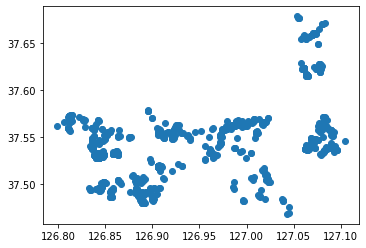

In [5]:
gdf.iloc[:1000].plot()